<a href="https://colab.research.google.com/github/Froglet0/POSA-15/blob/master/TW_DataWrangling_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

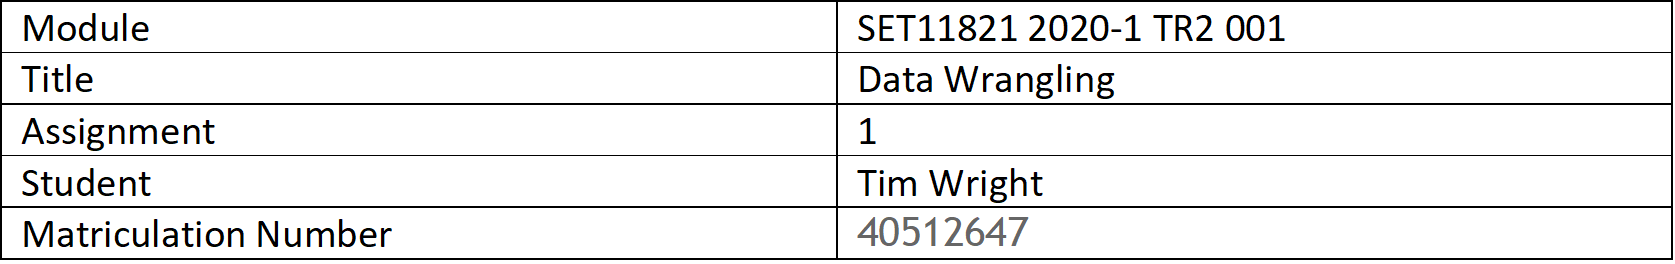

The assignment asks 5 questions based on a dataset, this being [Data on excess mortality during the COVID-19 pandemic by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality) but accessed from the [assignment section of Moodle](https://moodle.napier.ac.uk/mod/folder/view.php?id=1676249)

According to dataset description the following columns are pertinent to the questions asked:


1.   location: name of the country
2.   deaths_2020_all_ages: number of weekly deaths from all causes for all ages in 2020
3.   deaths_2019_all_ages: number of weekly deaths from all casues for all ages in 2019
4.   Week: week number in the year using week end dates in accordance with ISO 8601

In addition the questions also used the calulated difference on a week by week basis of the absolute detahs in 2020 compared to those in 2019





1) Create a DataFrame that consists of the following columns: (1) location; (2) average deaths for 2020; (3) average deaths of 2019; (4) the difference between average deaths of 2020 and 2019.
The location column should include the name of the respective country.

A pandas DataFrame is requested as the output for the question. The columns required are extracted from the dataset as follows:


1.   location: This can be taken directly from the location column in the dataset
2.   average deaths for 2020: This is assumed to be the single average death rate for the complete year calculated as the mean of the deaths_2020_all_ages column
3.   average deaths for 2019: This is assumed to be the single average death rate for the complete year calculated as the mean of the deaths_2019_all_ages column 
4.   the difference between the average deaths of 2020 and 2019: This is assumed to be the difference in 2020 with respect to 2019 and is therefore the value in 2 above less the value in 3 above





An initial DataFrame is therefore created by loading the relevant data from the .csv file. As the Load task is considered the most expensive this is performed only once with the resulting DataFrame configured to allow the results for the 5 questions to be answered.

In [ ]:
#import pandas
import pandas as pd

In [ ]:
# Mount Google drive using technique shown in Unit 4

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the specific data requested from the mortality data rather than all the data for efficiency

ex_mort = pd.read_csv('/content/drive/My Drive/Napier/DataWrangling/Assignment1/excess_mortality.csv',skipinitialspace=True, usecols=["location","date","deaths_2020_all_ages", "deaths_2019_all_ages","Week"])

In [ ]:
# Calculate the difference in deaths in 2020 when compared to 2019 and add this as a column to the DataFrame
# This data is used in later questions

ex_mort["ex_deaths_2020_to_2019"] = ex_mort["deaths_2020_all_ages"] - ex_mort["deaths_2019_all_ages"]

In [ ]:
# Rename columns and re-order them to match assignment requirements

ex_mort.rename(columns = {'deaths_2020_all_ages':'deaths_2020','deaths_2019_all_ages':'deaths_2019'}, inplace = True)
ex_mort=ex_mort[['location','deaths_2020','deaths_2019','ex_deaths_2020_to_2019','Week','date']]

In [ ]:
ex_mort

,location,deaths_2020,deaths_2019,ex_deaths_2020_to_2019,Week,date
0,Austria,1613.0,1647.0,-34.0,1,2020-01-05
1,Austria,1702.0,1709.0,-7.0,2,2020-01-12
2,Austria,1797.0,1641.0,156.0,3,2020-01-19
3,Austria,1779.0,1713.0,66.0,4,2020-01-26
4,Austria,1947.0,1732.0,215.0,5,2020-02-02
...,...,...,...,...,...,...
2036,United States,NaN,58453.0,NaN,52,2020-12-27
2037,United States,NaN,NaN,NaN,53,2021-01-03
2038,United States,NaN,NaN,NaN,1,2021-01-10
2039,United States,NaN,NaN,NaN,2,2021-01-17


In [ ]:
# Need to cite the Python for Data Analysis here

def top(df, column='ex_deaths_2020_to_2019'):
  return df.sort_values(by=column, na_position='first')[-5:]

ex_mort_grpd = ex_mort.groupby('location').apply(top)
ex_mort_grpd

location  deaths_2020  ...  Week        date
location                                        ...                  
Austria       45          Austria       2285.0  ...    46  2020-11-15
              49          Austria       2474.0  ...    50  2020-12-13
              47          Austria       2441.0  ...    48  2020-11-29
              46          Austria       2412.0  ...    47  2020-11-22
              48          Austria       2547.0  ...    49  2020-12-06
...                           ...          ...  ...   ...         ...
United States 1998  United States      72231.0  ...    14  2020-04-05
              2034  United States      73812.0  ...    50  2020-12-13
              2001  United States      73828.0  ...    17  2020-04-26
              2000  United States      76694.0  ...    16  2020-04-19
              1999  United States      79012.0  ...    15  2020-04-12

[185 rows x 6 columns]

In [ ]:
# Determine those countries that had at least one week with a positive excess deaths

pos_ex = ex_mort.groupby('location').max('ex_deaths_2020_to_2019')
pos_ex = pos_ex.loc[pos_ex['ex_deaths_2020_to_2019'] > 0]
pos_ex

,deaths_2020,deaths_2019,ex_deaths_2020_to_2019,Week
location,,,,
Austria,2547.0,1820.0,948.0,53
Belgium,4308.0,2544.0,2339.0,53
Bulgaria,4707.0,2848.0,2636.0,53
Canada,6815.0,6055.0,1390.0,53
Chile,3982.0,2506.0,1575.0,53
Croatia,1442.0,1319.0,527.0,53
Czechia,4212.0,2509.0,2146.0,53
Denmark,1273.0,1250.0,231.0,53
England & Wales,22351.0,12609.0,13326.0,53


In [ ]:
# For each country find which year had the lowest mortality

ex_mort_sum = ex_mort.groupby('location').sum()
ex_mort_sum.loc[ex_mort_sum['deaths_2019'] < ex_mort_sum['deaths_2020'], 'yr_lowest_mortality'] = '2019'
ex_mort_sum.loc[ex_mort_sum['deaths_2019'] >= ex_mort_sum['deaths_2020'], 'yr_lowest_mortality'] = '2020'
ex_mort_sum

,deaths_2020,deaths_2019,ex_deaths_2020_to_2019,Week,yr_lowest_mortality
location,,,,,
Austria,91508.0,81485.0,8026.0,1437,2019
Belgium,128770.0,108436.0,17909.0,1437,2019
Bulgaria,126075.0,107818.0,15365.0,1437,2019
Canada,240315.0,283065.0,13345.0,1437,2020
Chile,127335.0,109079.0,16046.0,1437,2019
Croatia,49223.0,51611.0,1694.0,1437,2020
Czechia,124423.0,112040.0,14628.0,1437,2019
Denmark,55475.0,53805.0,412.0,1437,2019
England & Wales,614105.0,527234.0,76802.0,1437,2019


In [ ]:
# For each week find which country had the highest mortality

## Still TODO

ex_mort_sum = ex_mort.groupby('location').sum()
ex_mort_sum.loc[ex_mort_sum['deaths_2019'] < ex_mort_sum['deaths_2020'], 'yr_lowest_mortality'] = '2019'
ex_mort_sum.loc[ex_mort_sum['deaths_2019'] >= ex_mort_sum['deaths_2020'], 'yr_lowest_mortality'] = '2020'
ex_mort_sum